In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

In [2]:
df=pd.read_csv('1 (2).csv')
df=df.loc[1:,]


In [3]:
for i in df.columns:
    df[i] = df[i].astype(float)

In [5]:
mean = df['Average(A)'].mean()
std = df['Average(A)'].std()
print(mean,std)

0.026845628770659664 0.7837681725216519


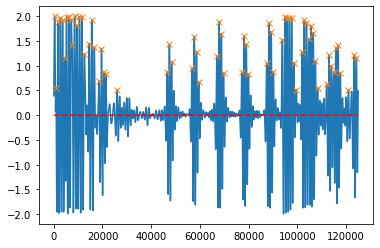

In [17]:
from scipy.signal import find_peaks
x = df['Average(A)']
peaks, _ = find_peaks(x, height=0.5)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="red")
plt.show()

In [19]:
pd.DataFrame(x[peaks]).to_csv('peaks_result.csv')

[2.1312851  1.25845884 0.77339822]


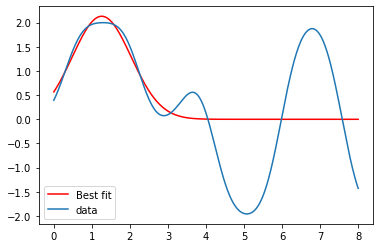

In [15]:
from scipy.optimize import curve_fit
  
# Let's create a function to model and create data
def func(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))
  
# Generating clean data
x = df['Time']
y = df['Average(A)']

fig = plt.figure()
ax = fig.add_subplot(111)
# Executing curve_fit on noisy data
popt, pcov = curve_fit(func, x, y,absolute_sigma= True)
  
#popt returns the best fit values for parameters of the given model (func)
print (popt)
  
ym = func(x, popt[0], popt[1], popt[2])
ax.plot(x[0:2000], ym[0:2000], c='r', label='Best fit')
ax.plot(x[0:2000],y[0:2000],label='data')
ax.legend()
#print(ym)

[-0.01816062  1.00509932 -0.0776019   0.00473358 -0.87202597 -0.99657058
  3.35927109]


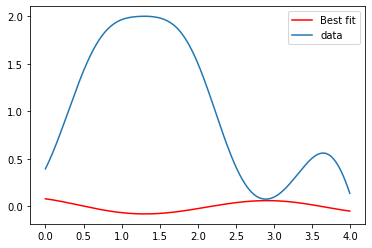

In [24]:
from scipy.optimize import curve_fit
  
# Let's create a function to model and create data
def func(x, a, b, c, d, x1, x2, x3):
    return a*np.sin((b*x) + x1) + c*np.sin(2*(b*x) + x2) + d*np.sin(3*(b*x) + x3)
  
# Generating clean data
x = df['Time']
y = df['Average(A)']

fig = plt.figure()
ax = fig.add_subplot(111)
# Executing curve_fit on noisy data
popt, pcov = curve_fit(func, x, y,absolute_sigma= True)
  
#popt returns the best fit values for parameters of the given model (func)
print (popt)
  
ym = func(x, popt[0], popt[1], popt[2],popt[3],popt[4],popt[5],popt[6])
ax.plot(x[0:1000], ym[0:1000], c='r', label='Best fit')
ax.plot(x[0:1000],y[0:1000],label='data')
ax.legend()
#print(ym)